In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
#from pandas_ml import ConfusionMatrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from time import time

In [3]:
q2_data_matrix = np.loadtxt('q2_data_matrix.csv', delimiter=',')
q2_labels = np.loadtxt('q2_labels.csv', delimiter=',')

OSError: q2_data_matrix.csv not found.

# Normalizing the Data 

In [4]:
u = np.mean(q2_data_matrix,axis = 0)
sig = np.std(q2_data_matrix,axis = 0)
q2_data_matrix_norm = (q2_data_matrix - u)/sig


# Splitting the data into Training and Test set

In [5]:
X_train, X_test, y_train, y_test = train_test_split(q2_data_matrix_norm ,q2_labels, test_size=0.3, random_state=42)

# Linear Kernel

In [6]:
classif_algo_linear =  SVC(C=16, kernel='linear')
start = time()
classifier = classif_algo_linear.fit(X_train,y_train)
print("Training time:", round(time() - start, 3), "s")
y_train_pred = classif_algo_linear.predict(X_train)
y_test_pred = classif_algo_linear.predict(X_test)
train_accuracy = accuracy_score(y_train,y_train_pred)
test_accuracy = accuracy_score(y_test,y_test_pred)
print('Training accuracy =',train_accuracy)
print('Test accuracy =', test_accuracy)


Training time: 0.031 s
Training accuracy = 0.8928571428571429
Test accuracy = 0.9066666666666666


# F1 Score, Confusion Matrix and Confusion plot for Linear Kernel

In [7]:
print('F1 Score =',f1_score(y_test, y_test_pred))
confusion_matrix = ConfusionMatrix(y_test, y_test_pred)
confusion_matrix


F1 Score = 0.8703703703703703


Predicted  False  True  __all__
Actual                         
False        178     7      185
True          21    94      115
__all__      199   101      300

<function matplotlib.pyplot.show(*args, **kw)>

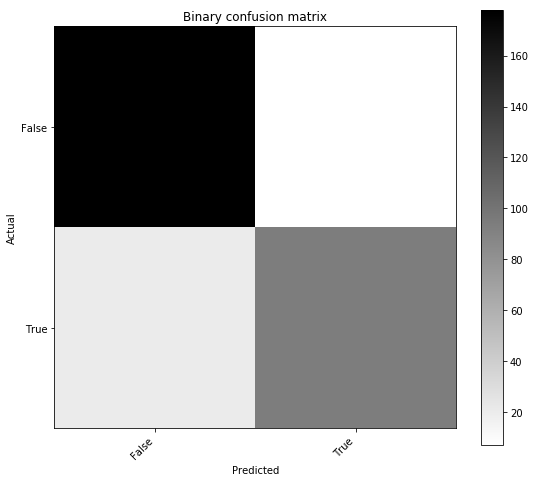

In [8]:
confusion_matrix.plot()
plt.show

# Gaussian Kernel

In [9]:
classif_algo_rbf =  SVC(C=10, kernel='rbf',gamma = 0.01)
start = time()
classifier = classif_algo_rbf.fit(X_train,y_train)
print("Training time:", round(time() - start, 3), "s")
y_train_pred = classif_algo_rbf.predict(X_train)
y_test_pred = classif_algo_rbf.predict(X_test)
train_accuracy = accuracy_score(y_train,y_train_pred)
test_accuracy = accuracy_score(y_test,y_test_pred)
print('Training accuracy =',train_accuracy)
print('Test accuracy =', test_accuracy)

Training time: 0.012 s
Training accuracy = 0.8857142857142857
Test accuracy = 0.9033333333333333


# F1 Score, Confusion Matrix and Confusion plot for Gaussian Kernel

In [10]:
print('F1 Score =',f1_score(y_test, y_test_pred))
confusion_matrix = ConfusionMatrix(y_test, y_test_pred)
confusion_matrix

F1 Score = 0.8638497652582161


Predicted  False  True  __all__
Actual                         
False        179     6      185
True          23    92      115
__all__      202    98      300

<function matplotlib.pyplot.show(*args, **kw)>

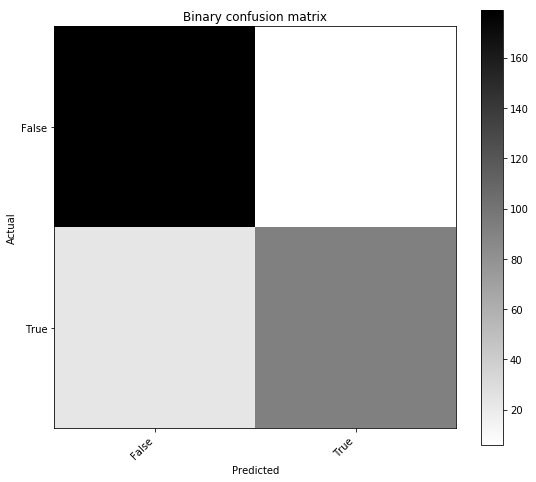

In [11]:
confusion_matrix.plot()
plt.show

# Polynomial Kernel

In [12]:
classif_algo_poly =  SVC(C=0.5, kernel='poly',gamma = 1,degree = 3)
start = time()
classifier = classif_algo_poly.fit(X_train,y_train)
print("Training time:", round(time() - start, 3), "s")
y_train_pred = classif_algo_poly.predict(X_train)
y_test_pred = classif_algo_poly.predict(X_test)
train_accuracy = accuracy_score(y_train,y_train_pred)
test_accuracy = accuracy_score(y_test,y_test_pred)
print('Training accuracy =',train_accuracy)
print('Test accuracy =', test_accuracy)


Training time: 0.205 s
Training accuracy = 0.9214285714285714
Test accuracy = 0.91


# F1 Score, Confusion Matrix and Confusion plot for Gaussian Kernel

In [13]:
print('F1 Score =',f1_score(y_test, y_test_pred))
confusion_matrix = ConfusionMatrix(y_test, y_test_pred)
confusion_matrix

F1 Score = 0.8778280542986426


Predicted  False  True  __all__
Actual                         
False        176     9      185
True          18    97      115
__all__      194   106      300

<function matplotlib.pyplot.show(*args, **kw)>

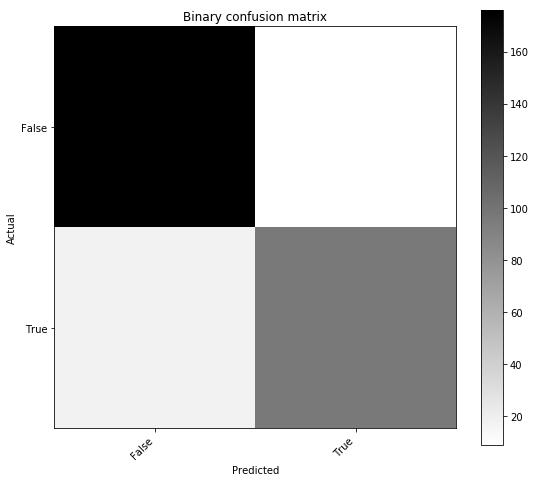

In [14]:
confusion_matrix.plot()
plt.show

# Finding the best kernel and hyperparameters by using Grid Search

In [16]:
parameters = {'kernel':('linear', 'rbf','poly'), 'C':[0.01,0.05,0.1,0.5,1,5,10],'gamma':[0.01,0.01,0.1,1],'degree': [2,3]}
svc = svm.SVC(gamma="scale")
clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(X_train,y_train)
clf.best_params_

{'C': 0.5, 'degree': 3, 'gamma': 1, 'kernel': 'poly'}